In [1]:
# %load ../jupyter_setup.txt
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True
%config IPCompleter.use_jedi=False 

# Install relevant google libraries

In [ ]:
!pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib

# Connecting to GDrive

Links:

https://developers.google.com/drive/api/v3/quickstart/python?authuser=1

## Imports

### Permissions

To make this work, you will have to follow these steps (with the Google Cloud API v3):

1. Create a new google project (or use an existing one):  
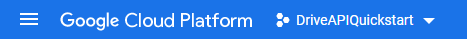

2. Enable Google Drive API  
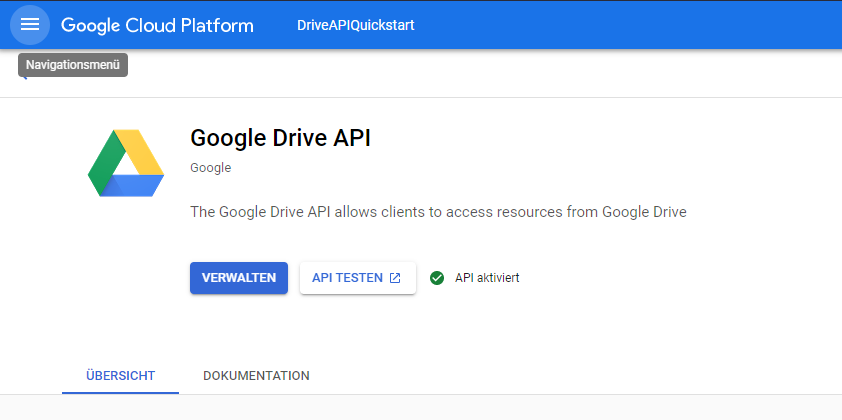
[Link](https://console.cloud.google.com/marketplace/product/google/drive.googleapis.com?q=search&referrer=search&authuser=2&project=driveapiquicksta-1612786670622)

3. Add OAuth 2.0 client:  
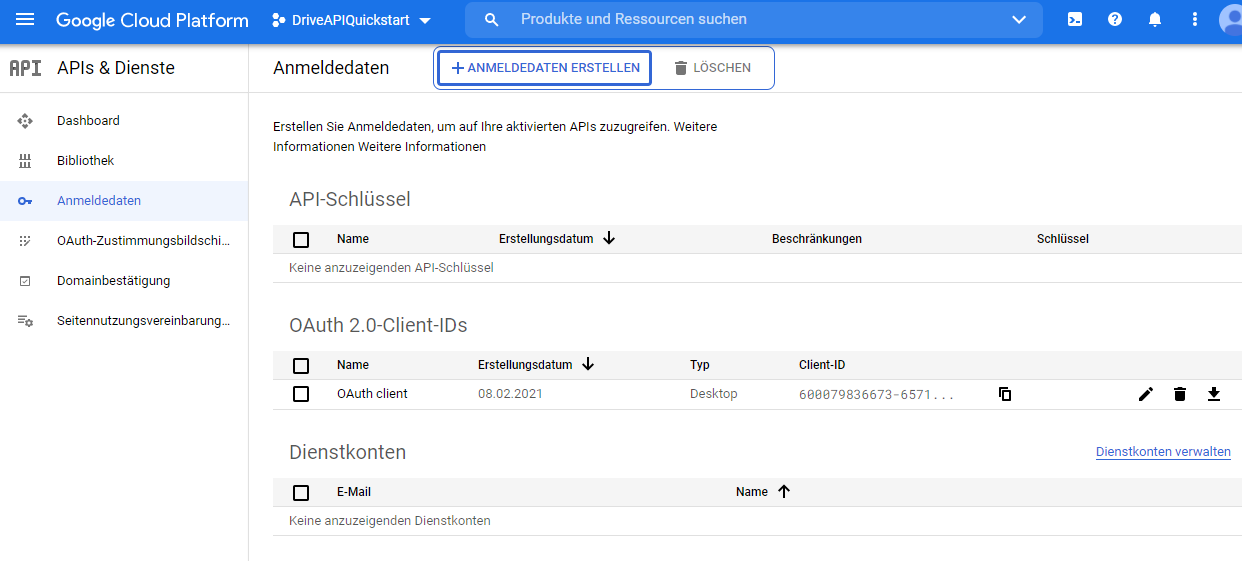
Select desktop app (with UI).
Then download and copy the OAuth cleint ID.

4. Edit OAuth permission requests
This sets which scopes the permission can ask for without crashing  
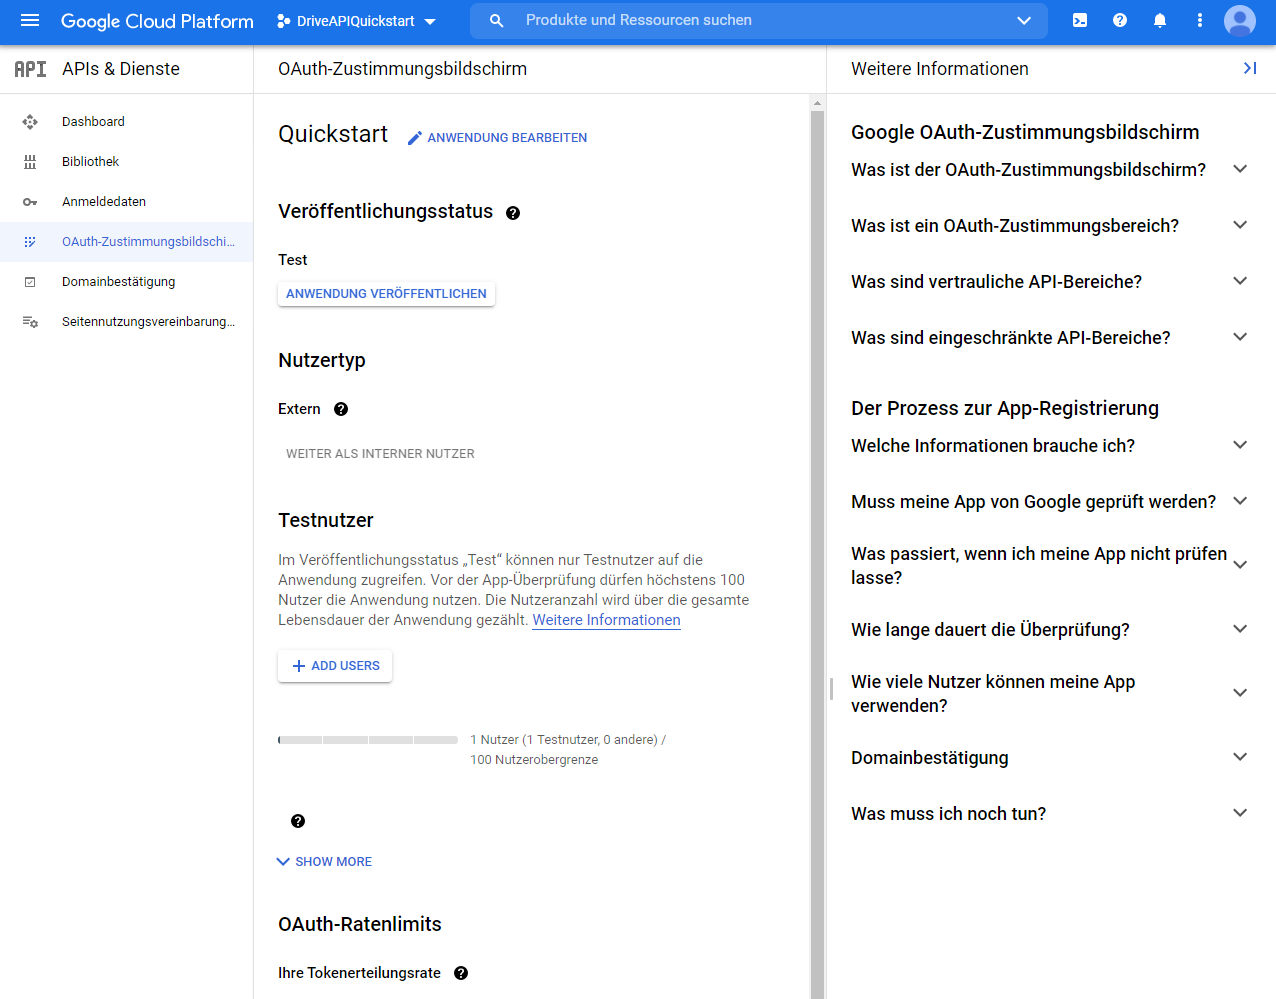

For GDrive Read only select the scope `.../auth/drive.readonly`  
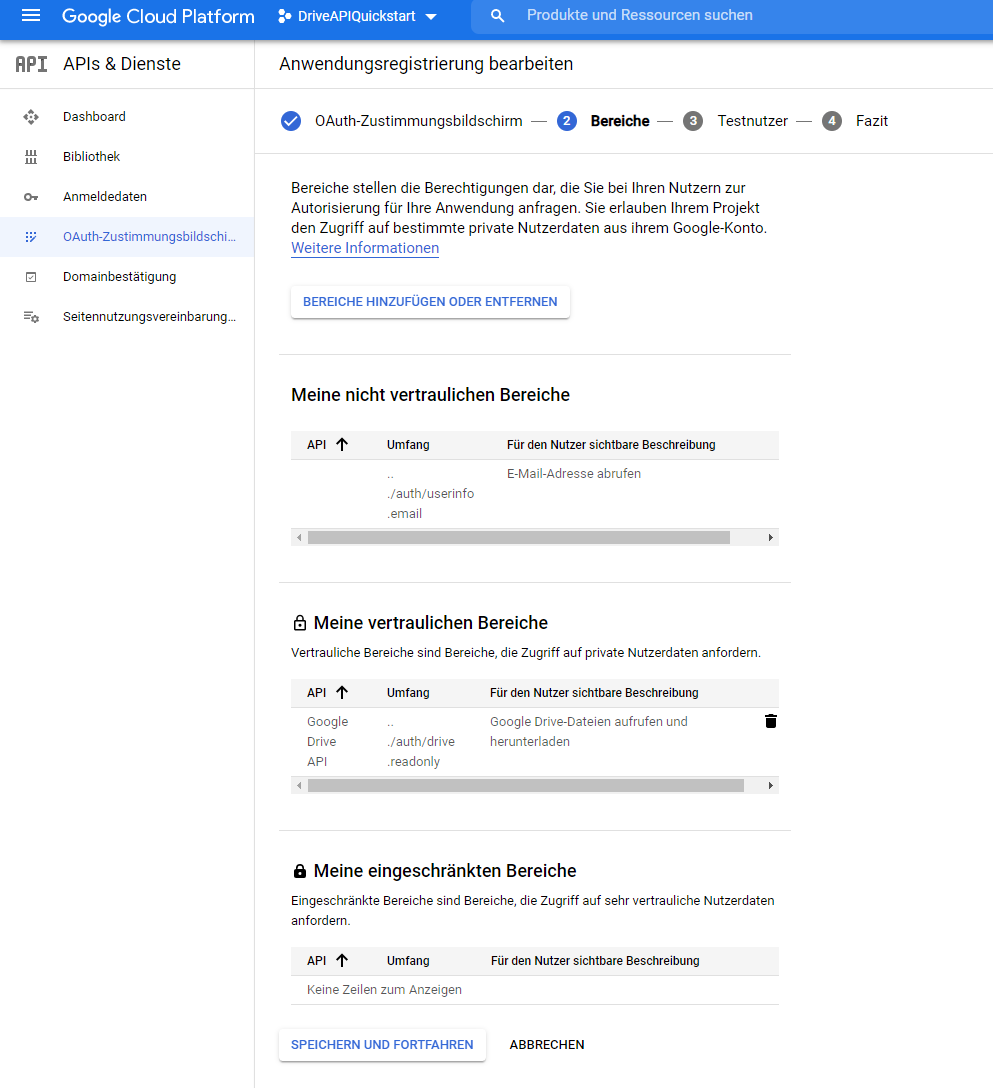

5. Add test users:  
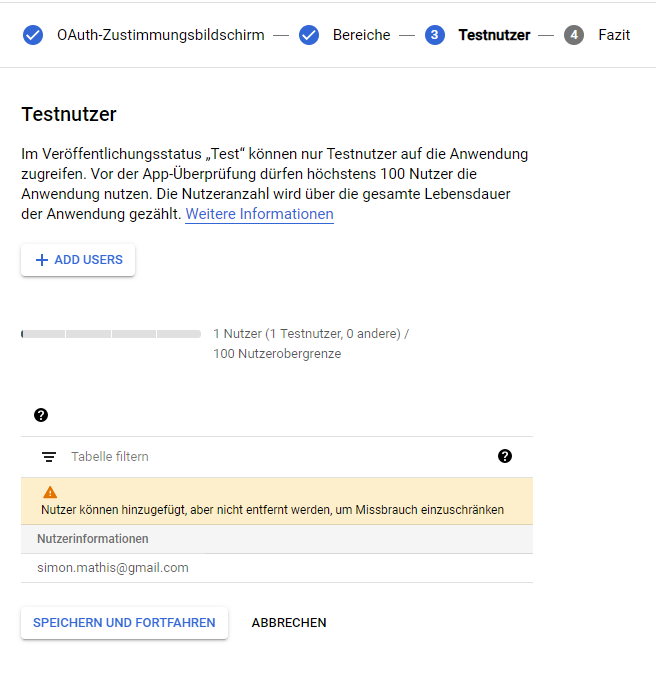

In [1]:
from src.data_loading.google_drive import DriveAPI

## Test downloaded file

In [2]:
obj = DriveAPI()
#obj._perform_oauth()
print(f"Signed in as {obj.username} ({obj.user_email})")

Signed in as Simon M. (simon.mathis@gmail.com)


In [3]:
gee_folder_id = obj.get_folder_id("GEE")
print(gee_folder_id)

1Ygkqh6zBVreZX18akDPi-C5q32lYapy-


In [4]:
# List all files in the GEE folder
gee_folder_id = obj.get_folder_id("GEE")
gee_folder_contents = obj.list_files_in_folder(gee_folder_id)
print(gee_folder_contents)

[{'id': '1Ob4ck0ULM2b8iR7n56EkgF5VEA5GP8NB', 'name': 'imageToDriveExample.tif'}]


In [6]:
%%time
# Download all files in GEE folder
for item in gee_folder_contents:
    file_name = item["name"] 
    if obj.is_tif(item["id"]):
        print(f"Fetching {file_name}")
        obj.file_download(item["id"],item["name"]) 

  0%|          | 0/100 [00:00<?, ?it/s]

Fetching imageToDriveExample.tif
Starting file download


100%|██████████| 100.0/100 [00:04<00:00, 22.78it/s]


File Downloaded
CPU times: user 794 ms, sys: 1.13 s, total: 1.92 s
Wall time: 5.14 s


Let's test the download speed with a 200 MB test file.

### Downloading on JASMIN SCI1
On sci1 with 204800 chunksize: 8 min  
On sci1 with 200 MB chunksize: 5 s

### Downloading on JASMIN XFER1:
On xfer1 with 204800 chunksize: 13 min  
On xfer1 with 100 MB chunksize: 5 s 
On xfer1 with 200 MB chunksize: 2.5s  

(Effective download speed that's reachable is probably ~ 50 MB/s --> total download will likely take ~1h)